In [1]:
# this lets us use the figures interactively
%matplotlib notebook

import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
from cartopy import config
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.ion() # make the plotting interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)

In [2]:
# load the bedrock geology layer of Northern Ireland
bedrocks = gpd.read_file('data_files/NIbedrocks_Down.shp')

In [3]:
print(bedrocks.head())

   MSLINK_0        UnitName  Code          area  \
0      3678  ACID VOLCANICS     5  4.171498e+05   
1      3678  ACID VOLCANICS     5  8.885223e+05   
2      3659  ACID VOLCANICS     5  9.223958e+05   
3      3596          BASALT     3  2.893850e+06   
4      3596          BASALT     3  4.994876e+08   

                                            geometry  
0  POLYGON ((306027.195 353143.694, 306147.747 35...  
1  POLYGON ((305968.411 353228.661, 306164.238 35...  
2  POLYGON ((319385.996 357532.585, 319634.394 35...  
3  POLYGON ((306448.456 340752.862, 306767.445 34...  
4  MULTIPOLYGON (((307998.880 362676.352, 308029....  


<IPython.core.display.Javascript object>


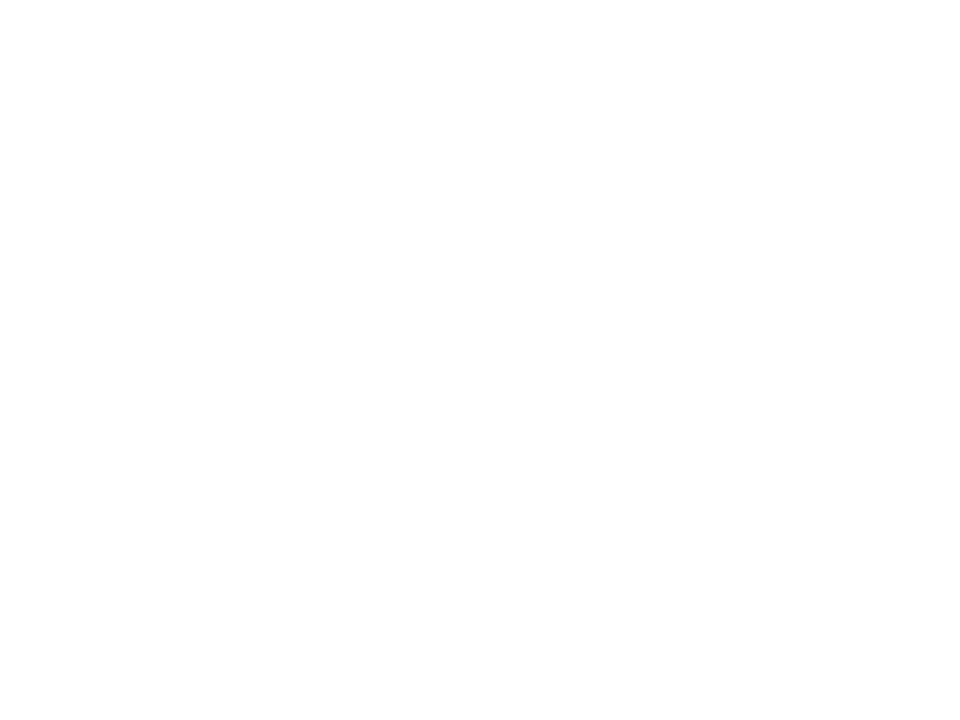

<AxesSubplot:>

In [4]:
bedrocks.plot('UnitName')

<IPython.core.display.Javascript object>


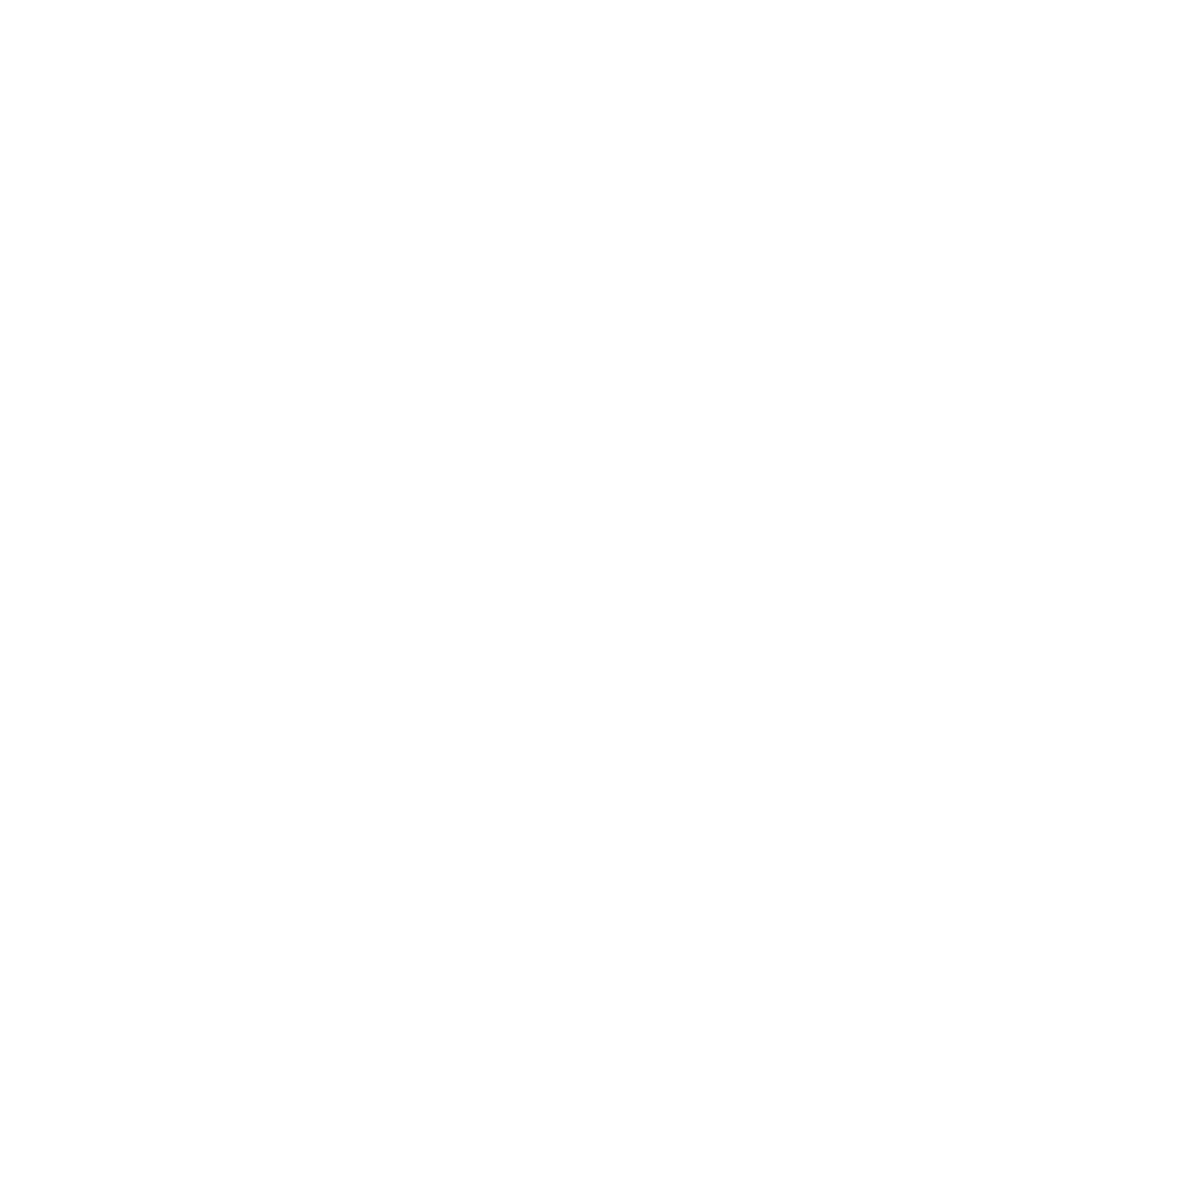

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


In [5]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = bedrocks.plot(axes=ax)
f.suptitle('Northern Ireland Bedrock Geology')
plt.show('UnitName')

In [6]:
bedrocks

,MSLINK_0,UnitName,Code,area,geometry
0,3678,ACID VOLCANICS,5,4.171498e+05,"POLYGON ((306027.195 353143.694, 306147.747 35..."
1,3678,ACID VOLCANICS,5,8.885223e+05,"POLYGON ((305968.411 353228.661, 306164.238 35..."
2,3659,ACID VOLCANICS,5,9.223958e+05,"POLYGON ((319385.996 357532.585, 319634.394 35..."
3,3596,BASALT,3,2.893850e+06,"POLYGON ((306448.456 340752.862, 306767.445 34..."
4,3596,BASALT,3,4.994876e+08,"MULTIPOLYGON (((307998.880 362676.352, 308029...."
...,...,...,...,...,...
324,3602,SANDSTONE,8,3.968780e+06,"POLYGON ((328356.349 367151.247, 329014.243 36..."
325,3686,SANDSTONE,8,4.976118e+06,"MULTIPOLYGON (((330569.778 367025.880, 330614...."
326,3602,SANDSTONE,8,5.009137e+07,"MULTIPOLYGON (((311616.631 357045.572, 311765...."
327,3602,SANDSTONE,8,7.848752e+07,"MULTIPOLYGON (((334462.783 374261.058, 334479...."


In [7]:
bedrocks.head

<bound method NDFrame.head of      MSLINK_0        UnitName  Code          area  \
0        3678  ACID VOLCANICS     5  4.171498e+05   
1        3678  ACID VOLCANICS     5  8.885223e+05   
2        3659  ACID VOLCANICS     5  9.223958e+05   
3        3596          BASALT     3  2.893850e+06   
4        3596          BASALT     3  4.994876e+08   
..        ...             ...   ...           ...   
324      3602       SANDSTONE     8  3.968780e+06   
325      3686       SANDSTONE     8  4.976118e+06   
326      3602       SANDSTONE     8  5.009137e+07   
327      3602       SANDSTONE     8  7.848752e+07   
328      3689       SANDSTONE     8  2.949386e+05   

                                              geometry  
0    POLYGON ((306027.195 353143.694, 306147.747 35...  
1    POLYGON ((305968.411 353228.661, 306164.238 35...  
2    POLYGON ((319385.996 357532.585, 319634.394 35...  
3    POLYGON ((306448.456 340752.862, 306767.445 34...  
4    MULTIPOLYGON (((307998.880 362676.352, 3080

In [8]:
bedrocks["UnitName"].unique()

array(['ACID VOLCANICS', 'BASALT', 'GABBRO', 'GRANITE', 'LIMESTONE',
       'LITHIC ARENITE', 'MUDSTONE', 'SANDSTONE'], dtype=object)

In [9]:
bedrocks.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [10]:
bedrocks.columns

Index(['MSLINK_0', 'UnitName', 'Code', 'area', 'geometry'], dtype='object')

In [11]:
rocks = bedrocks['UnitName'].tolist() # Get a list of a particular column (DERMOT)
print(rocks)

['ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'GABBRO', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRANITE', 'GRAN

In [12]:
bedrocks['UnitName'].value_counts()

LITHIC ARENITE    134
GRANITE            95
MUDSTONE           62
SANDSTONE          22
LIMESTONE           7
BASALT              5
ACID VOLCANICS      3
GABBRO              1
Name: UnitName, dtype: int64

In [13]:
bedrocks['UnitName'].value_counts(normalize=True)

LITHIC ARENITE    0.407295
GRANITE           0.288754
MUDSTONE          0.188450
SANDSTONE         0.066869
LIMESTONE         0.021277
BASALT            0.015198
ACID VOLCANICS    0.009119
GABBRO            0.003040
Name: UnitName, dtype: float64

In [14]:
bedrocks['UnitName'].describe()

count                329
unique                 8
top       LITHIC ARENITE
freq                 134
Name: UnitName, dtype: object

In [15]:
# load the radon data of Northern Ireland
radon = gpd.read_file('data_files/RadonNI_Down.shp')

In [16]:
radon.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [17]:
radon_bedrock = gpd.sjoin(bedrocks, radon, how='inner', lsuffix='left', rsuffix='right') 

In [18]:
radon_bedrock

,MSLINK_0,UnitName,Code,area,geometry,index_right,Tile,class,x,y,COUNTY_ID,CountyName,Area_SqKM,OBJECTID
1,3678,ACID VOLCANICS,5,8.885223e+05,"POLYGON ((305968.411 353228.661, 306164.238 35...",964,J0652,1,306500,352500,3,DOWN,2491.238606,6
1,3678,ACID VOLCANICS,5,8.885223e+05,"POLYGON ((305968.411 353228.661, 306164.238 35...",908,J0653,4,306500,353500,3,DOWN,2491.238606,6
2,3659,ACID VOLCANICS,5,9.223958e+05,"POLYGON ((319385.996 357532.585, 319634.394 35...",713,J1957,1,319500,357500,3,DOWN,2491.238606,6
3,3596,BASALT,3,2.893850e+06,"POLYGON ((306448.456 340752.862, 306767.445 34...",1673,J0639,3,306500,339500,3,DOWN,2491.238606,6
3,3596,BASALT,3,2.893850e+06,"POLYGON ((306448.456 340752.862, 306767.445 34...",1674,J0739,3,307500,339500,3,DOWN,2491.238606,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,3602,SANDSTONE,8,7.848752e+07,"MULTIPOLYGON (((334462.783 374261.058, 334479....",170,J4774,1,347500,374500,3,DOWN,2491.238606,6
327,3602,SANDSTONE,8,7.848752e+07,"MULTIPOLYGON (((334462.783 374261.058, 334479....",171,J4874,1,348500,374500,3,DOWN,2491.238606,6
327,3602,SANDSTONE,8,7.848752e+07,"MULTIPOLYGON (((334462.783 374261.058, 334479....",167,J4474,1,344500,374500,3,DOWN,2491.238606,6
327,3602,SANDSTONE,8,7.848752e+07,"MULTIPOLYGON (((334462.783 374261.058, 334479....",166,J4374,1,343500,374500,3,DOWN,2491.238606,6


In [19]:
radon_bedrock.to_file('data_files/radon_bedrock_down.shp')

<ipython-input-19-5fa150d2deb1>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  radon_bedrock.to_file('data_files/radon_bedrock_down.shp')


In [20]:
radon_bedrock = gpd.read_file('data_files/radon_bedrock_down.shp') # load the radon-counties shapefile

In [21]:
radon_bedrock

,MSLINK_0,UnitName,Code,area,index_righ,Tile,class,x,y,COUNTY_ID,CountyName,Area_SqKM,OBJECTID,geometry
0,3678,ACID VOLCANICS,5,8.885223e+05,964,J0652,1,306500,352500,3,DOWN,2491.238606,6,"POLYGON ((305968.411 353228.661, 306164.238 35..."
1,3678,ACID VOLCANICS,5,8.885223e+05,908,J0653,4,306500,353500,3,DOWN,2491.238606,6,"POLYGON ((305968.411 353228.661, 306164.238 35..."
2,3659,ACID VOLCANICS,5,9.223958e+05,713,J1957,1,319500,357500,3,DOWN,2491.238606,6,"POLYGON ((319385.996 357532.585, 319634.394 35..."
3,3596,BASALT,3,2.893850e+06,1673,J0639,3,306500,339500,3,DOWN,2491.238606,6,"POLYGON ((306448.456 340752.862, 306767.445 34..."
4,3596,BASALT,3,2.893850e+06,1674,J0739,3,307500,339500,3,DOWN,2491.238606,6,"POLYGON ((306448.456 340752.862, 306767.445 34..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,3602,SANDSTONE,8,7.848752e+07,170,J4774,1,347500,374500,3,DOWN,2491.238606,6,"MULTIPOLYGON (((334462.783 374261.058, 334479...."
2430,3602,SANDSTONE,8,7.848752e+07,171,J4874,1,348500,374500,3,DOWN,2491.238606,6,"MULTIPOLYGON (((334462.783 374261.058, 334479...."
2431,3602,SANDSTONE,8,7.848752e+07,167,J4474,1,344500,374500,3,DOWN,2491.238606,6,"MULTIPOLYGON (((334462.783 374261.058, 334479...."
2432,3602,SANDSTONE,8,7.848752e+07,166,J4374,1,343500,374500,3,DOWN,2491.238606,6,"MULTIPOLYGON (((334462.783 374261.058, 334479...."


In [22]:
radon_bedrock.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

<AxesSubplot:>

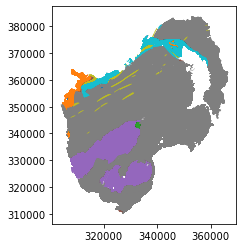

In [23]:
%matplotlib inline

radon_bedrock.plot('UnitName')

<AxesSubplot:>

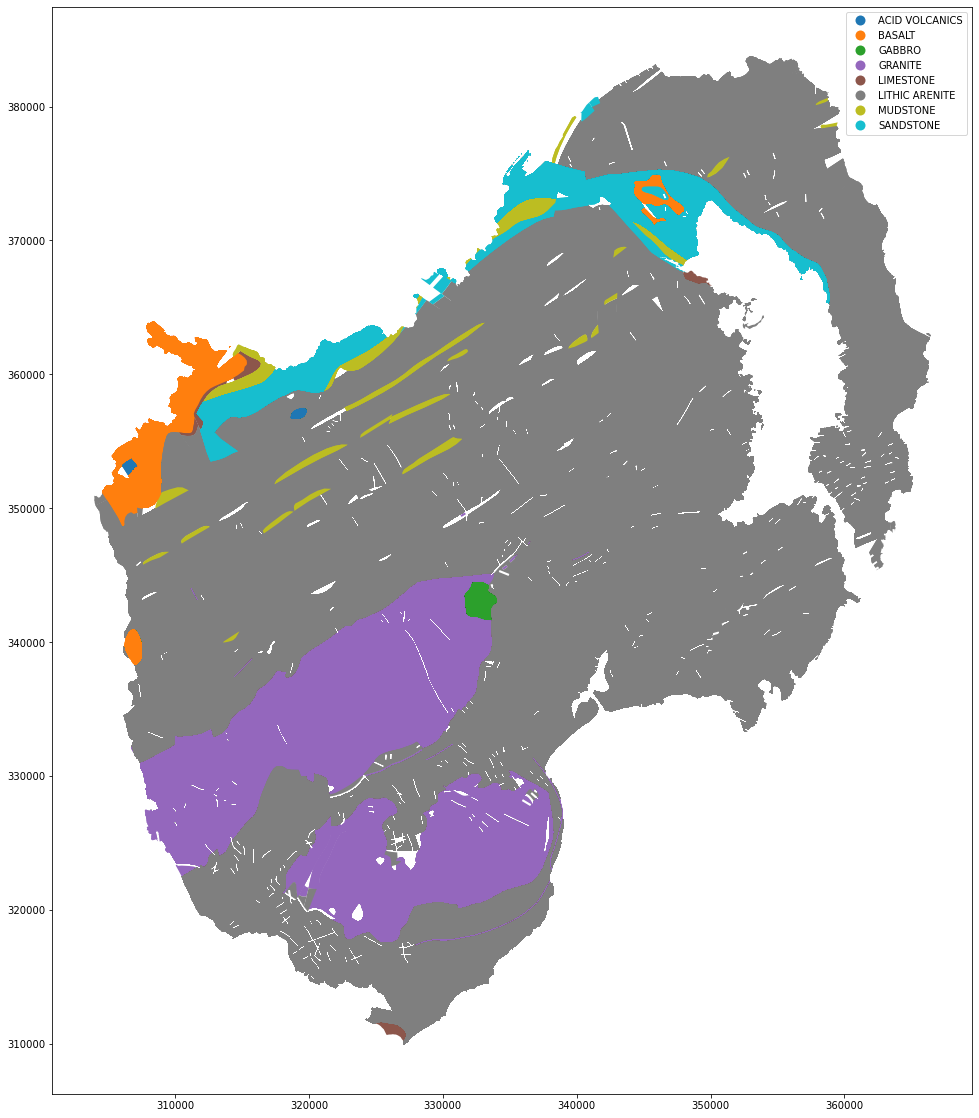

In [24]:
radon_bedrock.plot(column='UnitName', cmap=None, legend=True, figsize=(20, 20))

In [25]:
print(radon_bedrock.groupby(['UnitName', 'class'])['class'].count()) # summarize the radon distribution by CountyName

UnitName        class
ACID VOLCANICS  1          2
                4          1
BASALT          1         19
                2         14
                3         12
                4          1
GABBRO          1          1
                3          2
                4          2
GRANITE         1         34
                2         20
                3         48
                4        145
                5         80
                6         69
LIMESTONE       2          4
                4          1
                5          1
LITHIC ARENITE  1        488
                2        493
                3        413
                4        171
                5        205
                6         66
MUDSTONE        1         20
                2          7
                3         19
SANDSTONE       1         74
                2         19
                3          2
                4          1
Name: class, dtype: int64


In [26]:
radon_mean = radon_bedrock.groupby(['UnitName'])['class'].mean() # summarize the radon distribution by CountyName

<AxesSubplot:>

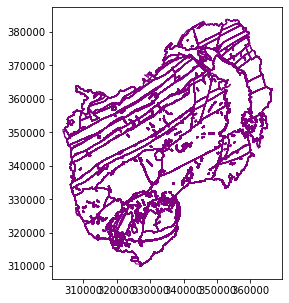

In [27]:
radon_bedrock.plot(figsize=(5,5), edgecolor="purple", facecolor="None")

In [28]:
columns_to_divide = ['open', 'close']
df[columns_to_divide] = df[columns_to_divide] / df['prev']

NameError: name 'df' is not defined